In [1]:
import torch
x = torch.rand(4,3)
x

tensor([[0.1748, 0.4594, 0.9705],
        [0.9549, 0.4316, 0.4790],
        [0.6556, 0.1682, 0.2293],
        [0.8235, 0.4762, 0.8565]])

In [2]:
x=torch.zeros(4,3,dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [3]:
x=torch.tensor([5.5,3])
x

tensor([5.5000, 3.0000])

In [4]:
x=x.new_ones(4,3,dtype=torch.double)
print(x)
x =torch.rand_like(x,dtype=torch.float)
print(x)
print(x.size())
print(x.shape)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[0.7743, 0.5509, 0.6363],
        [0.5834, 0.5382, 0.3912],
        [0.0342, 0.4799, 0.7790],
        [0.0086, 0.8275, 0.4477]])
torch.Size([4, 3])
torch.Size([4, 3])


In [5]:
x=torch.randn(4,4)
y=x.view(16)
z=x.view(-1,8)
print(x.size,y.size(),z.size())

<built-in method size of Tensor object at 0x0000020088677900> torch.Size([16]) torch.Size([2, 8])


In [10]:
x+=1
print(x,y)

tensor([[2, 3]]) tensor([ 0.8609,  1.4882,  1.1974,  1.5756,  2.6236, -0.2099,  3.6055,  2.4171,
        -0.3283, -1.1423, -0.9268,  0.3113,  2.5086,  1.8686,  1.0295,  0.6253])


In [13]:
x=torch.arange(1,3).view(1,2)
print(x)
y=torch.arange(1,4).view(3,1)
print(y)
print(x+y)

tensor([[1, 2]])
tensor([[1],
        [2],
        [3]])
tensor([[2, 3],
        [3, 4],
        [4, 5]])


In [14]:
import torch
x = torch.randn(3,3,requires_grad=True)
print(x.grad_fn)

None


In [17]:
x=torch.ones(2,2,requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [18]:
y=x**2
print(y)

tensor([[1., 1.],
        [1., 1.]], grad_fn=<PowBackward0>)


In [19]:
print(y.grad_fn)

In [20]:
z=y*y*3
out = z.mean()
print(z,out)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<MulBackward0>) tensor(3., grad_fn=<MeanBackward0>)


In [23]:
a = torch.randn(2,2)
a = ((a*3)/(a-1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b.grad_fn)

False
True


In [24]:
out

tensor(3., grad_fn=<MeanBackward0>)

In [25]:
out.backward()

In [29]:
print(x.grad)

tensor([[1., 1.],
        [1., 1.]])


In [31]:
out2 = x.sum()
out2.backward()
print(x)
print(x.grad)

out3 = x.sum()
x.grad.data.zero_()
out3.backward()
print(x)
print(x.grad)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[2., 2.],
        [2., 2.]])
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[1., 1.],
        [1., 1.]])


In [38]:
x = torch.randn(3,requires_grad=True)
print(x)
y=x*2
i=0
print(y.data.norm())
while y.data.norm() <1000:
    y = y*2
    i = i+1
print(y)
print(i)

tensor([-1.3302,  0.5749,  0.0737], requires_grad=True)
tensor(2.9020)
tensor([-1362.1292,   588.6553,    75.4723], grad_fn=<MulBackward0>)
9


In [39]:
v = torch.tensor([0.1,1,0.0001],dtype=torch.float)
y.backward(v)
print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [40]:
print(x.requires_grad)
print((x**2).requires_grad)
with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


In [41]:
x = torch.ones(1,requires_grad=True)
print(x.data)
print(x.data.requires_grad)
y=2**x
x.data *=100
y.backward()
print(x)
print(x.grad)

tensor([1.])
False
tensor([100.], requires_grad=True)
tensor([1.3863])


In [44]:
import os 
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import torch.optim as optimizer


In [45]:
batch_size=16
lr = 1e-4
max_epochs = 100


In [46]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

In [49]:
import torchvision
import torchvision.transforms as transforms

In [50]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


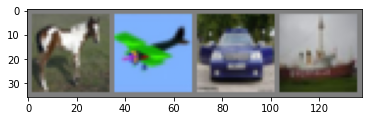

horse plane car   ship 


In [51]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [56]:
import torch 
from torch import nn
class MLP(nn.Module):
    def __init__(self, **kwargs):
        super(MLP,self).__init__(**kwargs)
        self.hidden = nn.Linear(784,256)
        self.act = nn.ReLU()
        self.output = nn.Linear(256,10)
    def forward(self,x):
        o = self.act(self.hidden(x))
        return self.output(o)

In [57]:
X = torch.rand(2,784)
net = MLP()
print(net)
net(X)

MLP(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (act): ReLU()
  (output): Linear(in_features=256, out_features=10, bias=True)
)


tensor([[-0.0916,  0.0477, -0.0379, -0.1421,  0.1903, -0.0155,  0.0130,  0.0290,
          0.0130, -0.0592],
        [-0.0959,  0.0586, -0.0240, -0.1332, -0.0462,  0.0104, -0.1026, -0.1199,
          0.1625, -0.0964]], grad_fn=<AddmmBackward0>)

In [58]:
# None parameter layers

import torch
from torch import nn

class MyLayer(nn.Module):
    def __init__(self,**kwargs):
        super(MyLayer,self).__init__(**kwargs)
        
    def forward(self,x):
        return x-x.mean()


In [60]:
layer= MyLayer()
layer(torch.tensor([1,2,3,4,6],dtype=torch.float))


tensor([-2.2000, -1.2000, -0.2000,  0.8000,  2.8000])

In [63]:
class MyListDense(nn.Module):
    def __init__(self):
        super(MyListDense, self).__init__()
        self.params = nn.ParameterList([nn.Parameter(torch.randn(4, 4)) for i in range(3)])
        self.params.append(nn.Parameter(torch.randn(4, 1)))

    def forward(self, x):
        for i in range(len(self.params)):
            x = torch.mm(x, self.params[i])
        return x
net = MyListDense()
print(net)

MyListDense(
  (params): ParameterList(
      (0): Parameter containing: [torch.FloatTensor of size 4x4]
      (1): Parameter containing: [torch.FloatTensor of size 4x4]
      (2): Parameter containing: [torch.FloatTensor of size 4x4]
      (3): Parameter containing: [torch.FloatTensor of size 4x1]
  )
)


In [64]:
class MyDictDense(nn.Module):
    def __init__(self):
        super(MyDictDense, self).__init__()
        self.params = nn.ParameterDict({
                'linear1': nn.Parameter(torch.randn(4, 4)),
                'linear2': nn.Parameter(torch.randn(4, 1))
        })
        self.params.update({'linear3': nn.Parameter(torch.randn(4, 2))}) # 新增

    def forward(self, x, choice='linear1'):
        return torch.mm(x, self.params[choice])

net = MyDictDense()
print(net)

MyDictDense(
  (params): ParameterDict(
      (linear1): Parameter containing: [torch.FloatTensor of size 4x4]
      (linear2): Parameter containing: [torch.FloatTensor of size 4x1]
      (linear3): Parameter containing: [torch.FloatTensor of size 4x2]
  )
)


In [65]:
import torch
from torch import nn

# 卷积运算（二维互相关）
def corr2d(X, K): 
    h, w = K.shape
    X, K = X.float(), K.float()
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i: i + h, j: j + w] * K).sum()
    return Y

# 二维卷积层
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super(Conv2D, self).__init__()
        self.weight = nn.Parameter(torch.randn(kernel_size))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return corr2d(x, self.weight) + self.bias

In [66]:
import torch
from torch import nn

# 定义一个函数来计算卷积层。它对输入和输出做相应的升维和降维
import torch
from torch import nn

# 定义一个函数来计算卷积层。它对输入和输出做相应的升维和降维
def comp_conv2d(conv2d, X):
    # (1, 1)代表批量大小和通道数
    X = X.view((1, 1) + X.shape)
    Y = conv2d(X)
    return Y.view(Y.shape[2:]) # 排除不关心的前两维:批量和通道


# 注意这里是两侧分别填充1⾏或列，所以在两侧一共填充2⾏或列
conv2d = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3,padding=1)

X = torch.rand(8, 8)
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [67]:
import torch
from torch import nn

def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 输入图像channel：1；输出channel：6；5x5卷积核
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 2x2 Max pooling
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # 如果是方阵,则可以只使用一个数字进行定义
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # 除去批处理维度的其他所有维度
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


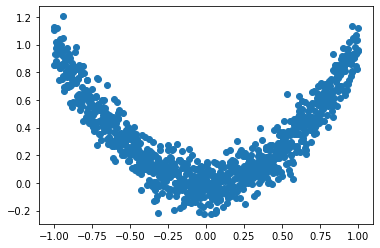

In [71]:
a = torch.linspace(-1,1,1000)
x = torch.unsqueeze(a,dim=1)
y = x.pow(2)+0.1*torch.normal(torch.zeros(x.size()))

plt.scatter(x,y)

In [73]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.hidden = nn.Linear(1,20)
        self.predict = nn.Linear(20,1)
    
    def forward(self,x):
        x = self.hidden(x)
        x = F.relu(x)
        x = self.predict(x)
        return x
        

In [74]:
optim = torch.optim.SGD(net.parameters(),lr=lr)
optim.step()

In [1]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [2]:
# 配置GPU，这里有两种方式
## 方案一：使用os.environ
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
# 方案二：使用“device”，后续对要使用GPU的变量用.to(device)即可
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

## 配置其他超参数，如batch_size, num_workers, learning rate, 以及总的epochs
batch_size = 256
num_workers = 0   # 对于Windows用户，这里应设置为0，否则会出现多线程错误
lr = 1e-4
epochs = 20

In [3]:
# 首先设置数据变换
from torchvision import transforms

image_size = 28
data_transform = transforms.Compose([
    transforms.ToPILImage(),  
     # 这一步取决于后续的数据读取方式，如果使用内置数据集读取方式则不需要
    transforms.Resize(image_size),
    transforms.ToTensor()
])

## 读取方式一：使用torchvision自带数据集，下载可能需要一段时间
from torchvision import datasets

train_data = datasets.FashionMNIST(root='./', train=True, download=True, transform=data_transform)
test_data = datasets.FashionMNIST(root='./', train=False, download=True, transform=data_transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers, drop_last=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)

In [4]:
class FMDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        self.images = df.iloc[:,1:].values.astype(np.uint8)
        self.labels = df.iloc[:,0].values
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self,idx):
        image = self.images[idx].reshape(28,28,1)
        label = int(self.labels[idx])
        if self.transform is not None:
            image = self.transform(image)
        else:
            image = torch.tensor(image/255.,dtype=torch.float)
        label = torch.tensor(label, dtype=torch.long)
        return image, label



In [5]:
train_df = pd.read_csv("./FashionMNIST/fashion-mnist_train.csv")
test_df = pd.read_csv("./FashionMNIST/fashion-mnist_test.csv")

train_data = FMDataset(train_df,data_transform)
test_data = FMDataset(test_df,data_transform)

In [6]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers, drop_last=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)

In [7]:
print(len(train_loader))

234


torch.Size([256, 1, 28, 28]) torch.Size([256])


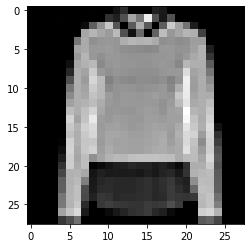

In [8]:
import matplotlib.pyplot as plt
print(test_loader)
image, label = next(iter(train_loader))
print(image.shape, label.shape)
plt.imshow(image[0][0], cmap="gray")

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1,32,5),
            nn.ReLU(),
            nn.MaxPool2d(2,stride=2),
            nn.Dropout(0.3),
            nn.Conv2d(32,64,5),
            nn.ReLU(),
            nn.MaxPool2d(2,stride=2),
            nn.Dropout(0.3)
        )
        self.fc = nn.Sequential(
            nn.Linear(64*4*4,512),
            nn.ReLU(),
            nn.Linear(512,10)
        )
    def forward(self,x):
        x = self.conv(x)
        x = x.view(-1,64*4*4)
        x = self.fc(x)
        return x
    
model = Net()


In [10]:
criterion = nn.CrossEntropyLoss()

In [11]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [15]:
def train(epoch):
    model.train()
    train_loss = 0
    for data, label in train_loader:
        data, label = data.cpu(), label.cpu()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
    train_loss = train_loss/len(train_loader.dataset)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))

In [16]:
def val(epoch):       
    model.eval()
    val_loss = 0
    gt_labels = []
    pred_labels = []
    with torch.no_grad():
        for data, label in test_loader:
            data, label = data.cpu(), label.cpu()
            output = model(data)
            preds = torch.argmax(output, 1)
            gt_labels.append(label.cpu().data.numpy())
            pred_labels.append(preds.cpu().data.numpy())
            loss = criterion(output, label)
            val_loss += loss.item()*data.size(0)
    val_loss = val_loss/len(test_loader.dataset)
    gt_labels, pred_labels = np.concatenate(gt_labels), np.concatenate(pred_labels)
    acc = np.sum(gt_labels==pred_labels)/len(pred_labels)
    print('Epoch: {} \tValidation Loss: {:.6f}, Accuracy: {:6f}'.format(epoch, val_loss, acc))

In [18]:
for epoch in range(1, 1+1):
    train(epoch)
    val(epoch)

Epoch: 1 	Training Loss: 0.386604
Epoch: 1 	Validation Loss: 0.331090, Accuracy: 0.878900


In [19]:
save_path = "./FahionModel.pkl"
torch.save(model, save_path)

In [ ]:
def my_loss(output,target):
    loss = torch.mean((output-target)**2)
    return loss



In [ ]:
class DiceLoss(nn.Module):
    def __init__(self,weight=None,size_average=True):
        super(DiceLoss,self).__init__()
    
    def forward(self,inputs, targets, smooth=1):
        inputs = F.sigmoid(inputs)
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        intersection = (inputs * targets).sum()
        dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)  
        return 1 - dice
criterion = DiceLoss()
loss = criterion(input,targets)

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
def func(x,a):
    return np.exp(-a * x)


[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0]
[0.06897752]


C:\Users\Dirac\AppData\Local\Temp/ipykernel_9932/348429733.py:5: RuntimeWarning: overflow encountered in exp
  return np.exp(-a * x)


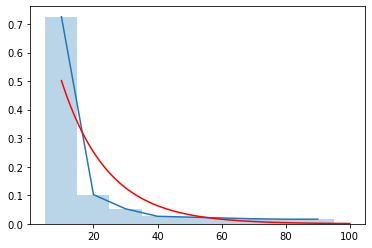

In [31]:
xdata = [10,20,30,40,50,60,70,80,90]
xdata=[float(i) for i in xdata]
print(xdata)
y = [497,70,36,18,16,14,12,11,11]
ydata = np.array(y)/np.sum(y)
plt.plot(xdata,ydata)
plt.bar(xdata,ydata,width=10,alpha=0.3)
prop,pcov = curve_fit(func,xdata,ydata)
print(prop)
#plt.plot(xdata, func(xdata, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
#plt.plot(xdata,func(xdata,*prop),color="red")
plt.plot(np.linspace(10,100,100),[func(i,prop[0]) for i in np.linspace(10,100,100)],color="red")

In [32]:
prop,pcov = curve_fit(func,x,yd)
print(prop,pcov)
plt.plot(np.linspace(10,90),[func(i,prop[0]) for i in np.linspace(10,90)],color="red")

NameError: name 'yd' is not defined

In [24]:
[func(i,prop[0]) for i in np.linspace(10,90)]

[0.036685400306347975,
 0.03153223513168083,
 0.027102930432724718,
 0.023295806179723842,
 0.020023465245219287,
 0.01721078709761388,
 0.014793203318796895,
 0.01271521535825654,
 0.010929120496938583,
 0.009393916773815536,
 0.008074361736435417,
 0.0069401634079340364,
 0.005965284898183215,
 0.005127346695585317,
 0.004407112918401675,
 0.003788049731894661,
 0.003255945794216518,
 0.0027985860179226994,
 0.0024054711579119133,
 0.0020675767885959266,
 0.0017771461373294883,
 0.0015275120183419447,
 0.0013129437794492877,
 0.0011285157480238497,
 0.0009699941562402745,
 0.0008337399498304543,
 0.0007166252492052145,
 0.000615961545207075,
 0.0005294379811410176,
 0.0004550683042728639,
 0.0003911452690029453,
 0.00033620144498494744,
 0.0002889755304930344,
 0.00024838339771998707,
 0.00021349320531626262,
 0.00018350400684829724,
 0.0001577273641074275,
 0.00013557154318076327,
 0.00011652793048576684,
 0.00010015935693223307,
 8.609006217873061e-05,
 7.399706860091221e-05,
 6.36

In [7]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [8]:
def func(x,a,b,c):
    return a * np.exp(-b*x)+c

[0.         0.08163265 0.16326531 0.24489796 0.32653061 0.40816327
 0.48979592 0.57142857 0.65306122 0.73469388 0.81632653 0.89795918
 0.97959184 1.06122449 1.14285714 1.2244898  1.30612245 1.3877551
 1.46938776 1.55102041 1.63265306 1.71428571 1.79591837 1.87755102
 1.95918367 2.04081633 2.12244898 2.20408163 2.28571429 2.36734694
 2.44897959 2.53061224 2.6122449  2.69387755 2.7755102  2.85714286
 2.93877551 3.02040816 3.10204082 3.18367347 3.26530612 3.34693878
 3.42857143 3.51020408 3.59183673 3.67346939 3.75510204 3.83673469
 3.91836735 4.        ]


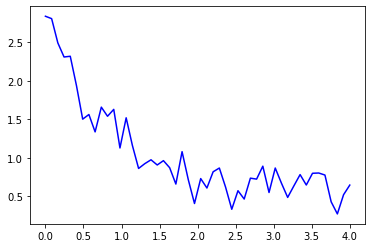

In [10]:
xdata = np.linspace(0,4,50)
print(xdata)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata,ydata,"b-",label="data")


In [13]:
popt, pcov = curve_fit(func, xdata,ydata)
print(popt)
print(pcov)

[2.3472433  1.31247625 0.58809301]
[[ 0.01119667  0.0049717  -0.00058748]
 [ 0.0049717   0.01637838  0.00431743]
 [-0.00058748  0.00431743  0.00214262]]


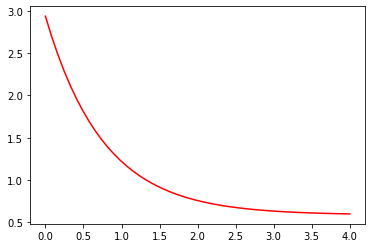

In [12]:
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

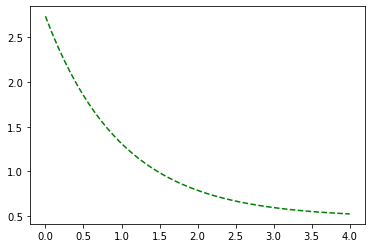

In [14]:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

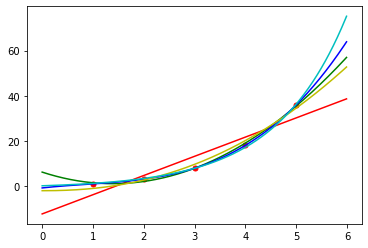

In [17]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

#线性
def func_linear(x, a, b):
    return a * x+ b
#二次
def func_poly_2(x, a, b, c):
    return a*x*x + b*x + c
#三次
def func_poly_3(x, a, b, c , d):
    return a*x*x*x + b*x*x + c*x + d
#幂函数
def func_power(x, a, b):
    return x**a + b
#指数函数
def func_exp(x, a, b):
    return a**x + b

# 待拟合点
xdata = [1, 2, 3, 4, 5]
ydata = [1, 3, 8, 18, 36]

x = list(np.arange(0, 6, 0.01))

# 绘制散点
plt.scatter(xdata[:], ydata[:], 25, "red")

# popt数组中，存放的就是待求的参数a,b,c,......
popt, pcov = curve_fit(func_linear, xdata, ydata)
y1 = [func_linear(i, popt[0], popt[1]) for i in x]
plt.plot(x, y1, 'r')


popt, pcov = curve_fit(func_poly_2, xdata, ydata)
y2 = [func_poly_2(i, popt[0], popt[1], popt[2] ) for i in x]
plt.plot(x, y2, 'g')

popt, pcov = curve_fit(func_poly_3, xdata, ydata)
y3 = [func_poly_3(i, popt[0], popt[1], popt[2] ,popt[3]) for i in x]
plt.plot(x, y3, 'b')

popt, pcov = curve_fit(func_power, xdata, ydata)
y4 = [func_power(i, popt[0], popt[1]) for i in x]
plt.plot(x, y4, 'y')

popt, pcov = curve_fit(func_exp, xdata, ydata)
y5 = [func_exp(i, popt[0], popt[1]) for i in x]
plt.plot(x, y5, 'c')

plt.show()


In [7]:
import torch.nn as nn
class mysequatial(nn.Module):
    from collections import OrderedDict
    def __init__(self, *args):
        super(mysequatial, self).__init__()
        if len(args) == 1 and isinstance(args[0],OrderedDict):
            for key,module in args[0].items():
                self.add_module in args.iters()
                self.add_module(key,module)
            else:
                for idx, module in enumerate(args):
                    self.add_module(str(idx), module)
    def forward(self,input):
        for module in self._modules.values():
            input = module(input)
        return input
    
            

In [9]:
net = nn.Sequential(
    nn.Linear(786,246),
    nn.ReLU(),
    nn.Linear(256,10),
    )
print(net)
print(dir(net))

Sequential(
  (0): Linear(in_features=786, out_features=246, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=10, bias=True)
)
['T_destination', '__annotations__', '__call__', '__class__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_backward_hooks', '_buffers', '_call_impl', '_forward_hooks', '_forward_pre_hooks', '_get_backward_hooks', '_get_item_by_idx', '_get_name', '_is_full_backward_hook', '_load_from_state_dict', '_load_state_dict_post_hooks', '_load_state_dict_pre_hooks', '_maybe_warn_non_full_backward_hook', '_modules', '_named_members', '_non_persistent_buffers_set',

In [12]:
import collections
import torch.nn as nn

net2 = nn.Sequential(collections.OrderedDict([
    ("fc1",nn.Linear(786,256)),
    ("relu1",nn.ReLU()),
    ("fc2",nn.Linear(256,10))
]))
print(net2)
print(dir(net2))

Sequential(
  (fc1): Linear(in_features=786, out_features=256, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)
['T_destination', '__annotations__', '__call__', '__class__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_backward_hooks', '_buffers', '_call_impl', '_forward_hooks', '_forward_pre_hooks', '_get_backward_hooks', '_get_item_by_idx', '_get_name', '_is_full_backward_hook', '_load_from_state_dict', '_load_state_dict_post_hooks', '_load_state_dict_pre_hooks', '_maybe_warn_non_full_backward_hook', '_modules', '_named_members', '_non_persistent_buffe

In [ ]:
net = nn.ModuleList([nn.Linear(784,256),nn.ReLU()])

net.append(nn.Linear(276.10))


# U-Net